# 🧪 Project Name : Customer Value Dashboard
**Goal: Create a pivot-based dashboard showing Customer Lifetime Value (CLV), Orders, and Spend trends by Gender and Tier — and export everything.**

## Step 1: Import and Load Data

In [40]:
import pandas as pd

df = pd.read_csv("Output/customer_data_cleaned.csv") #dont mind the "output/ here its just the path" 
df.head()

,Customer,Gender,Spend,Total_orders,Tier
0,Alice,Female,600,10,Platinum
1,Bob,Male,320,5,Gold
2,Charlie,Male,150,3,Regular
3,David,Male,450,6,Gold
4,Eva,Female,520,8,Platinum


## Step 2: Create CLV if it’s not there

In [41]:
# Optional: In case you haven’t calculated CLV yet
df['CLV'] = df['Spend'] * df['Total_orders']

## Step 3: Pivot Table 1 – Avg CLV by Tier & Gender

In [42]:
clv_pivot = pd.pivot_table(
    data=df,
    index='Tier',
    columns='Gender',
    values='CLV',
    aggfunc='mean'
)

clv_pivot


Gender,Female,Male
Tier,,
Gold,1902.5,2150.0
Platinum,4530.0,6710.0
Regular,NaN,775.0


## Step 4: Pivot Table 2 – Total Orders by Tier & Gender

In [43]:
orders_pivot = pd.pivot_table(
    data=df,
    index='Tier',
    columns='Gender',
    values='Total_orders',
    aggfunc='sum'
)

orders_pivot


Gender,Female,Male
Tier,,
Gold,11.0,11.0
Platinum,25.0,11.0
Regular,NaN,7.0


## Step 5: Pivot Table 3 – Avg Spend by Tier & Gender

In [44]:
spend_pivot = pd.pivot_table(
    data=df,
    index='Tier',
    columns='Gender',
    values='Spend',
    aggfunc='mean'
)

spend_pivot


Gender,Female,Male
Tier,,
Gold,342.500000,385.0
Platinum,536.666667,610.0
Regular,NaN,212.5


## Step 6: Export All Pivot Tables

In [45]:
# Exporting all pivot tables into separate sheets in a single Excel file
with pd.ExcelWriter("Output/customer_value_dashboard.xlsx") as writer: #install openpyxl if not though !pip here
    clv_pivot.to_excel(writer, sheet_name='Avg_CLV')
    orders_pivot.to_excel(writer, sheet_name='Total_Orders')
    spend_pivot.to_excel(writer, sheet_name='Avg_Spend')

print("All pivot tables exported to 'customer_value_dashboard.xlsx'")


All pivot tables exported to 'customer_value_dashboard.xlsx'


## Step 7: Add Optional Visualization (for flavor)

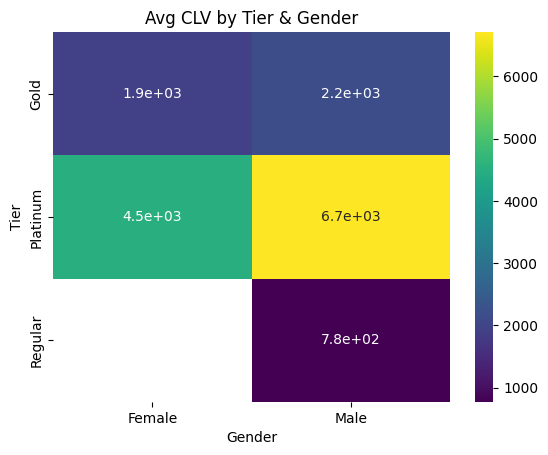

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple heatmap to show Avg CLV
sns.heatmap(clv_pivot, annot=True, cmap='viridis')
plt.title("Avg CLV by Tier & Gender")
plt.show()
#the 2.2e+03 is just scientific notation we can remove them by simply: plt.ticklabel_format(style='plain', axis='both') 

## 🧠 Final Thoughts:
I built a clean multi-pivot dashboard, exported it for reporting, and visualized one key metric.
Perfect for any entry-level job portfolio or presentation.